In [36]:
import argparse
import os
import openai
from utils import data_utils, logging_utils
import pickle
from typing import List
from generate_responses import generate_responses
from evaluate_uncertainty import evaluate_uncertainty
from evaluate_accuracy import evaluate_accuracy
from evaluate_calibration import evaluate_calibration
import config
import torch
import uncertainty
import evaluate
import argparse

In [37]:
tokenizer, model = config.initialize_components(args=None)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [5]:
%load_ext autoreload
%autoreload 2

In [44]:
question = 'In what country is the state of Texas located?'
response_groups = [['Texas is located in the US', 'Texas is located in the United States'], ['Texas is located in Canada', 'Texas is located in the United States'], ['Texas is a state that is a part of the United States', 'Texas is located in the US'], 
                   ['The Alamo is in Texas', 'Texas is part of the United States']]


# question = 'After Arthur Balfour, who became the succeeding British Prime Minister?'

# responses = ['The succeeding British Prime Minister after Arthur Balfour was Henry Campbell-Bannerman.',
# 'Following Arthur Balfour, the next British Prime Minister was Henry Campbell-Bannerman, who served from 1905 to 1908.',
# 'After Arthur Balfour, the succeeding British Prime Minister was Sir Henry Campbell-Bannerman.',
# 'The succeeding British Prime Minister after Arthur Balfour was Henry Campbell-Bannerman.',
# 'Following Arthur Balfour, the next British Prime Minister was Henry Campbell-Bannerman, who served from December 5, 1905, to April 5, 1908.',
# 'David Lloyd George became the Prime Minister of Britain after Arthur Balfour.']

# # get all pairs of responses
# from itertools import combinations
# combs = list(combinations(responses, 2))
# response_groups = [[comb[0], comb[1]] for comb in combs]


response_groups_concat = [[question + ' ' + response + '.' for response in response_group] for response_group in response_groups]

response_groups

[['Texas is located in the US', 'Texas is located in the United States'],
 ['Texas is located in Canada', 'Texas is located in the United States'],
 ['Texas is a state that is a part of the United States',
  'Texas is located in the US'],
 ['The Alamo is in Texas', 'Texas is part of the United States']]

In [45]:
responses = [response_groups]
responses_concat = [response_groups_concat]

In [46]:
uncertainty_vals = (uncertainty.calculate_embedding_variance_from_text(response_groups, model, tokenizer)).tolist()

for i in range(len(response_groups)):
    print()
    print(response_groups[i])
    print(round(uncertainty_vals[i], 4))

print()

pca_uncertainty_vals = []
for group in response_groups:
    pca_uncertainty_vals.append(uncertainty.calculate_pca_variance_from_text(group, model, tokenizer, 1)[0])


for i in range(len(response_groups)):
    print(response_groups[i], round(pca_uncertainty_vals[i], 4))



['Texas is located in the US', 'Texas is located in the United States']
0.0088

['Texas is located in Canada', 'Texas is located in the United States']
0.0091

['Texas is a state that is a part of the United States', 'Texas is located in the US']
0.0089

['The Alamo is in Texas', 'Texas is part of the United States']
0.0093

['Texas is located in the US', 'Texas is located in the United States'] 0.0367
['Texas is located in Canada', 'Texas is located in the United States'] 0.6367
['Texas is a state that is a part of the United States', 'Texas is located in the US'] 0.5278
['The Alamo is in Texas', 'Texas is part of the United States'] 1.7166


In [22]:
# now evaluate on concatenated responses
uncertainty_vals = (uncertainty.calculate_embedding_variance_from_text(response_groups_concat, model, tokenizer)).tolist()

for i in range(len(response_groups_concat)):
    print(response_groups_concat[i], round(uncertainty_vals[i], 4))

print()

pca_uncertainty_vals = []
for group in response_groups_concat:
    pca_uncertainty_vals.append(uncertainty.calculate_pca_variance_from_text(group, model, tokenizer, 1)[0])

for i in range(len(response_groups_concat)):
    print(response_groups_concat[i], round(pca_uncertainty_vals[i], 4))

['In what country is the state of Texas located? United States.', 'In what country is the state of Texas located? USA.'] 0.801
['In what country is the state of Texas located? United States.', 'In what country is the state of Texas located? Canada.'] 0.8465
['In what country is the state of Texas located? Texas is located in the United States.', 'In what country is the state of Texas located? United States.'] 0.801
['In what country is the state of Texas located? Texas is located in the United States.', 'In what country is the state of Texas located? Canada.'] 0.8292
['In what country is the state of Texas located? Texas is located in the United States.', 'In what country is the state of Texas located? Texas is located in Canada.'] 0.8395
['In what country is the state of Texas located? Gastric bypass.', 'In what country is the state of Texas located? Linen t-shirt.'] 0.7736

['In what country is the state of Texas located? United States.', 'In what country is the state of Texas locate

Results Analysis

In [47]:
accuracy_filename = 'accuracy_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
answers_filename = 'answers_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
responses_filename = 'responses_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
perturbed_questions_filename = 'perturbed_questions_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
original_questions_filename = 'original_questions_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
uncertainty_filename = 'uncertainty_trivia_qa_validation_gpt-3.5-turbo_all.pkl'


import pickle
accuracy_results = pickle.load(open(accuracy_filename, 'rb'))
answers = pickle.load(open(answers_filename, 'rb'))
responses = pickle.load(open(responses_filename, 'rb'))
perturbed_questions = pickle.load(open(perturbed_questions_filename, 'rb'))
original_questions = pickle.load(open(original_questions_filename, 'rb'))
uncertainty_results = pickle.load(open(uncertainty_filename, 'rb'))

In [54]:
uncertainty_results

{'model_uncertainty': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0

In [52]:
original_questions

array([[['Who was the man behind The Chipmunks?',
         'Who was the man behind The Chipmunks?',
         'Who was the man behind The Chipmunks?', ...,
         'Who was the man behind The Chipmunks?',
         'Who was the man behind The Chipmunks?',
         'Who was the man behind The Chipmunks?']],

       [['Which Lloyd Webber musical premiered in the US on 10th December 1993?',
         'Which Lloyd Webber musical premiered in the US on 10th December 1993?',
         'Which Lloyd Webber musical premiered in the US on 10th December 1993?',
         ...,
         'Which Lloyd Webber musical premiered in the US on 10th December 1993?',
         'Which Lloyd Webber musical premiered in the US on 10th December 1993?',
         'Which Lloyd Webber musical premiered in the US on 10th December 1993?']],

       [['Who was the next British Prime Minister after Arthur Balfour?',
         'Who was the next British Prime Minister after Arthur Balfour?',
         'Who was the next British 

In [53]:
perturbed_questions

array([[['Who was the man behind The Chipmunks?']],

       [['Which Lloyd Webber musical premiered in the US on 10th December 1993?']],

       [['Who was the next British Prime Minister after Arthur Balfour?']],

       [['Who had a 70s No 1 hit with Kiss You All Over?']],

       [['What claimed the life of singer Kathleen Ferrier?']],

       [['Rita Coolidge sang the title song for which Bond film?']],

       [['What was the last US state to reintroduce alcohol after prohibition?']],

       [['Which actress was voted Miss Greenwich Village in 1942?']],

       [['What is the Japanese share index called?']],

       [["What was the name of Michael Jackson's autobiography written in 1988?"]],

       [['In which decade did stereo records first go on sale?']],

       [["In what year's Olympics were electric timing devices and a public-address system used for the first time?"]],

       [['Which volcano in Tanzania is the highest mountain in Africa?']],

       [['The flag of Libya

In [49]:
accuracy_results

{'exact_match': tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]]]),
 'ask_for_accuracy': tensor([[[1., 1., 0.,  ..., 1., 1., 1.]],
 
         [[1., 1., 0.,  ..., 1., 1., 1.]],
 
         [[1., 1., 0.,  ..., 1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.]]])}

In [50]:
answers

array([[['David Seville', 'David Seville', 'David Seville', ...,
         'David Seville', 'David Seville', 'David Seville']],

       [['Sunset Boulevard', 'Sunset Boulevard', 'Sunset Boulevard',
         ..., 'Sunset Boulevard', 'Sunset Boulevard',
         'Sunset Boulevard']],

       [['Campbell-Bannerman', 'Campbell-Bannerman',
         'Campbell-Bannerman', ..., 'Campbell-Bannerman',
         'Campbell-Bannerman', 'Campbell-Bannerman']],

       ...,

       [['Jimmy Carr', 'Jimmy Carr', 'Jimmy Carr', ..., 'Jimmy Carr',
         'Jimmy Carr', 'Jimmy Carr']],

       [['Fort Boyard', 'Fort Boyard', 'Fort Boyard', ...,
         'Fort Boyard', 'Fort Boyard', 'Fort Boyard']],

       [['Max Bygraves', 'Max Bygraves', 'Max Bygraves', ...,
         'Max Bygraves', 'Max Bygraves', 'Max Bygraves']]], dtype='<U46')

In [51]:
responses

array([[['Ross Bagdasarian, Sr. was the man behind The Chipmunks.',
         'The man behind The Chipmunks was Ross Bagdasarian Sr.',
         'The man behind The Chipmunks was Ross Bagdasarian.', ...,
         'The man behind The Chipmunks was Ross Bagdasarian, Sr.',
         'Ross Bagdasarian, Sr. was the man behind The Chipmunks.',
         'Ross Bagdasarian, Sr. was the man behind The Chipmunks.']],

       [['Sunset Boulevard premiered in the US on 10th December 1993.',
         'Sunset Boulevard premiered in the US on 10th December 1993.',
         'Joseph and the Amazing Technicolor Dreamcoat premiered in the US on 10th December 1993.',
         ...,
         'Sunset Boulevard premiered in the US on 10th December 1993.',
         '"Sunset Boulevard" premiered in the US on 10th December 1993.',
         '"Sunset Boulevard" premiered in the US on 10th December 1993.']],

       [['The next British Prime Minister after Arthur Balfour was Henry Campbell-Bannerman.',
         'The ne

In [70]:
import pandas as pd
def results_to_csv(answers, responses, perturbed_questions, original_questions, uncertainty_results, accuracy_results, filename):
    data = []
    for i in range(len(answers)):
        for j in range(len(answers[i])):
            for k in range(len(answers[i][j])):
                answer = answers[i][j][k]
                response = responses[i][j][k]
                perturbed_question = perturbed_questions[i][j][0]
                original_question = original_questions[i][j][0]
                accuracy_exact_match = accuracy_results['exact_match'][i][j][k].item()
                accuracy_ask_for_accuracy = accuracy_results['ask_for_accuracy'][i][j][k].item()
                data_uncertainty = uncertainty_results['data_uncertainty'][i].item()
                model_uncertainty = uncertainty_results['model_uncertainty'][i].item()
                total_uncertainty = uncertainty_results['total_uncertainty'][i].item()
                rouge_l_uncertainty = uncertainty_results['rouge_l_uncertainty'][i].item()
                exact_match_uncertainty = uncertainty_results['exact_match_uncertainty'][i].item()
                num_sets_uncertainty = uncertainty_results['num_sets_uncertainty'][i].item()
                data_dic = {'answer': answer, 'response': response, 'perturbed_question': perturbed_question, 'original_question': original_question, 'accuracy_exact_match': accuracy_exact_match, 'accuracy_ask_for_accuracy': accuracy_ask_for_accuracy, 'data_uncertainty': data_uncertainty, 'model_uncertainty': model_uncertainty, 'total_uncertainty': total_uncertainty, 'rouge_l_uncertainty': rouge_l_uncertainty, 'exact_match_uncertainty': exact_match_uncertainty, 'num_sets_uncertainty': num_sets_uncertainty}
                data.append(data_dic)
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    return df

In [71]:
perturbed_questions.shape

(400, 1, 1)

In [72]:
df = results_to_csv(answers, responses, perturbed_questions, original_questions, uncertainty_results, accuracy_results, 'results.csv')

In [73]:
df

,answer,response,perturbed_question,original_question,accuracy_exact_match,accuracy_ask_for_accuracy,data_uncertainty,model_uncertainty,total_uncertainty,rouge_l_uncertainty,exact_match_uncertainty
0,David Seville,"Ross Bagdasarian, Sr. was the man behind The C...",Who was the man behind The Chipmunks?,Who was the man behind The Chipmunks?,0.0,1.0,0.061149,0.0,0.061149,0.821594,2.046439
1,David Seville,The man behind The Chipmunks was Ross Bagdasar...,Who was the man behind The Chipmunks?,Who was the man behind The Chipmunks?,0.0,1.0,0.061149,0.0,0.061149,0.821594,2.046439
2,David Seville,The man behind The Chipmunks was Ross Bagdasar...,Who was the man behind The Chipmunks?,Who was the man behind The Chipmunks?,0.0,0.0,0.061149,0.0,0.061149,0.821594,2.046439
3,David Seville,Ross Bagdasarian Sr. was the man behind The Ch...,Who was the man behind The Chipmunks?,Who was the man behind The Chipmunks?,0.0,1.0,0.061149,0.0,0.061149,0.821594,2.046439
4,David Seville,The man behind The Chipmunks was Ross Bagdasar...,Who was the man behind The Chipmunks?,Who was the man behind The Chipmunks?,0.0,1.0,0.061149,0.0,0.061149,0.821594,2.046439
...,...,...,...,...,...,...,...,...,...,...,...
3995,Max Bygraves,Max Bygraves presented Family Fortunes in the ...,Who presented Family Fortunes in the two years...,Who presented Family Fortunes in the two years...,0.0,1.0,0.034128,0.0,0.034128,0.945455,0.468996
3996,Max Bygraves,Max Bygraves presented Family Fortunes in the ...,Who presented Family Fortunes in the two years...,Who presented Family Fortunes in the two years...,0.0,1.0,0.034128,0.0,0.034128,0.945455,0.468996
3997,Max Bygraves,Max Bygraves presented Family Fortunes in the ...,Who presented Family Fortunes in the two years...,Who presented Family Fortunes in the two years...,0.0,1.0,0.034128,0.0,0.034128,0.945455,0.468996
3998,Max Bygraves,The presenter of Family Fortunes in the two ye...,Who presented Family Fortunes in the two years...,Who presented Family Fortunes in the two years...,0.0,1.0,0.034128,0.0,0.034128,0.945455,0.468996


In [74]:
df.describe()

,accuracy_exact_match,accuracy_ask_for_accuracy,data_uncertainty,model_uncertainty,total_uncertainty,rouge_l_uncertainty,exact_match_uncertainty
count,4000.000000,4000.00000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000
mean,0.000750,0.84925,0.051049,0.0,0.051049,0.888660,1.221851
std,0.027379,0.35785,0.070345,0.0,0.070345,0.113181,0.944324
min,0.000000,0.00000,0.000000,0.0,0.000000,0.334257,0.000000
25%,0.000000,1.00000,0.001555,0.0,0.001555,0.831520,0.468996
50%,0.000000,1.00000,0.022265,0.0,0.022265,0.917286,1.156780
75%,0.000000,1.00000,0.071839,0.0,0.071839,0.980455,1.960964
max,1.000000,1.00000,0.414486,0.0,0.414486,1.000000,3.321928


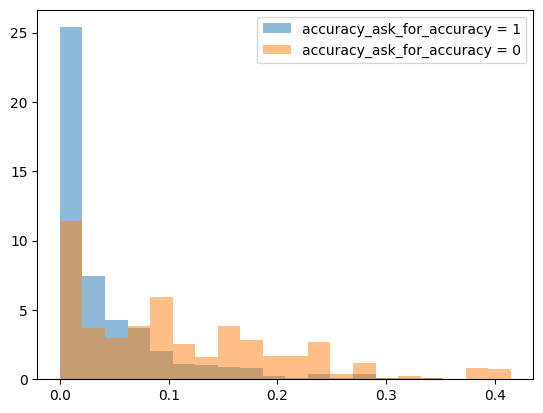

In [77]:
df_ask_for_accuracy_1 = df[df['accuracy_ask_for_accuracy'] == 1]
df_ask_for_accuracy_0 = df[df['accuracy_ask_for_accuracy'] == 0]

plt.hist(df_ask_for_accuracy_1['total_uncertainty'], bins=20, alpha=0.5, label='accuracy_ask_for_accuracy = 1', density=True)
plt.hist(df_ask_for_accuracy_0['total_uncertainty'], bins=20, alpha=0.5, label='accuracy_ask_for_accuracy = 0', density=True)
plt.legend(loc='upper right')
plt.show()




In [78]:
df_ask_for_accuracy_1.describe()

,accuracy_exact_match,accuracy_ask_for_accuracy,data_uncertainty,model_uncertainty,total_uncertainty,rouge_l_uncertainty,exact_match_uncertainty
count,3397.000000,3397.0,3397.000000,3397.0,3397.000000,3397.000000,3397.000000
mean,0.000883,1.0,0.040662,0.0,0.040662,0.894955,1.134602
std,0.029709,0.0,0.058705,0.0,0.058705,0.112798,0.913272
min,0.000000,1.0,0.000000,0.0,0.000000,0.334257,0.000000
25%,0.000000,1.0,0.000378,0.0,0.000378,0.837681,0.468996
50%,0.000000,1.0,0.018422,0.0,0.018422,0.924741,0.970951
75%,0.000000,1.0,0.059313,0.0,0.059313,0.985714,1.770951
max,1.000000,1.0,0.414486,0.0,0.414486,1.000000,3.321928


In [79]:
df_ask_for_accuracy_0.describe()

,accuracy_exact_match,accuracy_ask_for_accuracy,data_uncertainty,model_uncertainty,total_uncertainty,rouge_l_uncertainty,exact_match_uncertainty
count,603.0,603.0,603.000000,603.0,603.000000,603.000000,603.000000
mean,0.0,0.0,0.109565,0.0,0.109565,0.853199,1.713368
std,0.0,0.0,0.096909,0.0,0.096909,0.108793,0.966271
min,0.0,0.0,0.000000,0.0,0.000000,0.334257,0.000000
25%,0.0,0.0,0.026602,0.0,0.026602,0.785645,0.921928
50%,0.0,0.0,0.086002,0.0,0.086002,0.868142,1.770951
75%,0.0,0.0,0.173317,0.0,0.173317,0.939130,2.446439
max,0.0,0.0,0.414486,0.0,0.414486,1.000000,3.321928


In [80]:
accuracy_filename = 'accuracy_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
answers_filename = 'answers_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
responses_filename = 'responses_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
perturbed_questions_filename = 'perturbed_questions_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
original_questions_filename = 'original_questions_trivia_qa_validation_gpt-3.5-turbo_all.pkl'
uncertainty_filename = 'uncertainty_trivia_qa_validation_gpt-3.5-turbo_all.pkl'


import pickle
accuracy_results = pickle.load(open(accuracy_filename, 'rb'))
answers = pickle.load(open(answers_filename, 'rb'))
responses = pickle.load(open(responses_filename, 'rb'))
perturbed_questions = pickle.load(open(perturbed_questions_filename, 'rb'))
original_questions = pickle.load(open(original_questions_filename, 'rb'))
uncertainty_results = pickle.load(open(uncertainty_filename, 'rb'))

In [81]:
df = results_to_csv(answers, responses, perturbed_questions, original_questions, uncertainty_results, accuracy_results, 'results.csv')

In [82]:
df.describe()

,accuracy_exact_match,accuracy_ask_for_accuracy,data_uncertainty,model_uncertainty,total_uncertainty,rouge_l_uncertainty,exact_match_uncertainty
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.000250,0.892250,0.050988,0.037232,0.088220,0.753476,1.929202
std,0.015811,0.310103,0.060717,0.042275,0.078805,0.135140,0.767151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.438780,0.000000
25%,0.000000,1.000000,0.008672,0.008117,0.033727,0.647477,1.360964
50%,0.000000,1.000000,0.030243,0.023400,0.068021,0.753817,1.960964
75%,0.000000,1.000000,0.068359,0.054435,0.116298,0.856901,2.521928
max,1.000000,1.000000,0.388579,0.283930,0.453993,1.000000,3.321928


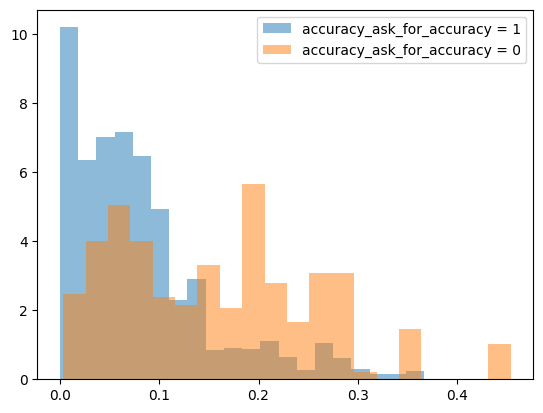

In [83]:
df_ask_for_accuracy_1 = df[df['accuracy_ask_for_accuracy'] == 1]
df_ask_for_accuracy_0 = df[df['accuracy_ask_for_accuracy'] == 0]

plt.hist(df_ask_for_accuracy_1['total_uncertainty'], bins=20, alpha=0.5, label='accuracy_ask_for_accuracy = 1', density=True)
plt.hist(df_ask_for_accuracy_0['total_uncertainty'], bins=20, alpha=0.5, label='accuracy_ask_for_accuracy = 0', density=True)
plt.legend(loc='upper right')
plt.show()


